In [1]:
import sys
sys.path.append('../../functions')

import numpy as np
import matplotlib.pyplot as plt
import glob
from output_funcs import openFile, ODea, NC, PrevalenceTheoryM3
from output_funcs import PrevalenceTheoryM1, RoI_fluctuationsM2
from output_funcs import PrevalenceTheoryM2, NCM2
from output_funcs import RoI_fluctuationsM1M3, RoI_approximation
from scipy.integrate import odeint
import pandas as pd
import statsmodels

In [2]:
files = glob.glob('../data/dataHPC/*')

In [3]:
param_all = {'repeats': 500,
            'T': 500, 
            'BT': 300,
            'p': 1/500,
            'ST': 0}
ts = np.arange(0, param_all['T']+param_all['BT'], 0.1)


# Emergence Results

In [4]:
emFiles = [file for file in files if 'emergence' in file]


In [5]:
parametersEm = {'beta0': 0.12, 
               'gamma':0.2,
                'I0': [0,0,0], 
               'nu': 0.001,
               'mu': 0,
               'p_0': 0,
               'psign': 1,
               'N': 100000,
               }

In [6]:
EmResults = openFile(filePath = [file for file in emFiles if 'Em_' in file][0], 
                     realisations = param_all['repeats'],
                     T=param_all['T'],
                     BT= param_all['BT'],
                     ST= param_all['ST'],
                    beta0=parametersEm['beta0'],
                     gamma=parametersEm['gamma'],
                     nu=parametersEm['nu'],
                     mu=parametersEm['mu'],
                     p0=parametersEm['p_0'],
                     p = param_all['p'],
                     Initial=parametersEm['I0'],
                     sign =parametersEm['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM3,
                     functionInc=NC,
                     functionOdea= ODea)
FixResults = openFile(filePath = [file for file in emFiles if 'Fix' in file][0], 
                     realisations = param_all['repeats'],
                     T=param_all['T'],
                     BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersEm['beta0'],
                     gamma=parametersEm['gamma'],
                     nu=parametersEm['nu'],
                     mu=parametersEm['mu'],
                     p0=parametersEm['p_0'],
                     p = param_all['p'],
                     Initial=parametersEm['I0'],
                     sign =parametersEm['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM3,
                     functionInc=NC,
                     functionOdea= ODea)

In [7]:
r0_1_t = (parametersEm['gamma']/parametersEm['beta0']-1)/param_all['p'] + param_all['BT']

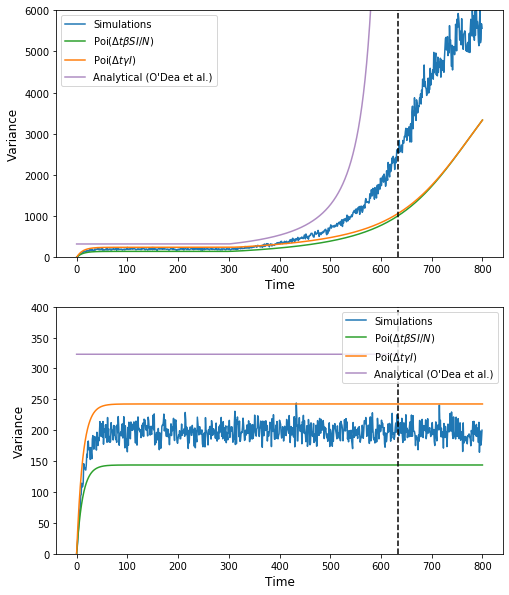

In [8]:
fig, ax = plt.subplots(2,1, figsize = (8, 10))
ax[0].plot(range(param_all['T']+param_all['BT']), np.var(EmResults['I_sim'],0), 
           label = 'Simulations')

ax[0].plot(ts, EmResults['I_theory'][:,0]*parametersEm['N'],
           c='tab:green',
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
ax[0].plot(ts, EmResults['I_theory'][:,1]*parametersEm['N'],
           c='tab:orange',
           label = 'Poi'+r'$(\Delta t \gamma I $)')

ax[0].plot(ts[:round(r0_1_t)*10], EmResults['I_theoryOdea'][1][:round(r0_1_t)*10]*parametersEm['N'], 
           c='#af8dc3',
           label = "Analytical (O'Dea et al.)")
ax[0].plot([r0_1_t, r0_1_t], [0, 1000000],
           '--',
           c='k')
ax[0].set_ylim([0, 6000])
ax[0].set_ylabel('Variance', fontsize = 12)
ax[0].set_xlabel('Time', fontsize = 12)
ax[0].legend()




ax[1].plot(range(param_all['T']+param_all['BT']), np.var(FixResults['I_sim'],0), 
           label = 'Simulations')

ax[1].plot(ts, FixResults['I_theory'][:,0]*parametersEm['N'],
           c='tab:green', 
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
ax[1].plot(ts, FixResults['I_theory'][:,1]*parametersEm['N'],
           c='tab:orange', 
           label = 'Poi'+r'$(\Delta t \gamma I $)')
ax[1].plot(ts[:round(r0_1_t)*10], FixResults['I_theoryOdea'][1][:round(r0_1_t)*10]*parametersEm['N'],
           c='#af8dc3',
           label = "Analytical (O'Dea et al.)")
ax[1].plot([r0_1_t, r0_1_t], [0, 1000000],
           '--', 
           c='k')
ax[1].set_ylim([0, 400])
ax[1].set_ylabel('Variance', fontsize = 12)
ax[1].set_xlabel('Time', fontsize = 12)
ax[1].legend(loc = 'upper right')

# Elimination data

# Changing $\beta$ (SIS with social distancing) 


In [9]:
extFiles = [file for file in files if '500' in file]

In [10]:
parametersExt = {'beta0': 1, 
               'gamma':0.2,
                'I0': [0.8,0,0], 
               'nu': 0,
               'mu': 0,
               'p_0': 0,
               'psign': -1,
                 'N':10000}

In [11]:
ExtResults = openFile(filePath = [file for file in extFiles if 'Ext' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],
                     BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersExt['beta0'],
                     gamma=parametersExt['gamma'],
                     nu=parametersExt['nu'],
                     mu=parametersExt['mu'],
                     p0=parametersExt['p_0'],
                     p = param_all['p'],
                     Initial=parametersExt['I0'],
                     sign =parametersExt['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM1,
                     functionInc=NC)
FixResults = openFile(filePath = [file for file in extFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],
                     BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersExt['beta0'],
                     gamma=parametersExt['gamma'],
                     nu=parametersExt['nu'],
                     mu=parametersExt['mu'],
                     p0=parametersExt['p_0'],
                     p = param_all['p'],
                     Initial=parametersExt['I0'],
                     sign =parametersExt['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM1,
                     functionInc=NC)

In [12]:
r0_1_t = (parametersExt['psign']*parametersExt['gamma']/parametersExt['beta0']+1)/param_all['p'] + param_all['BT']


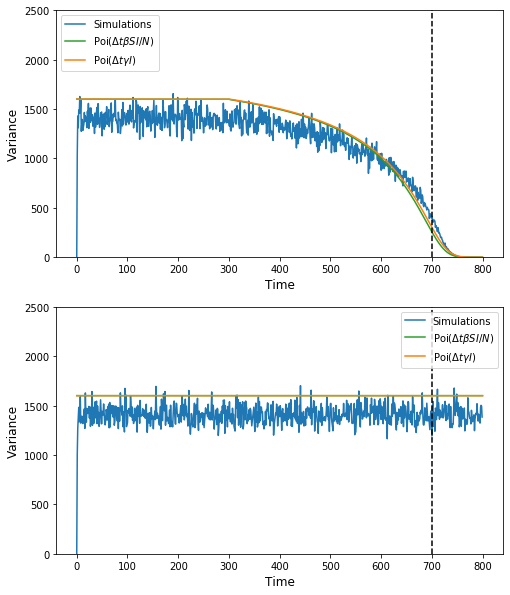

In [13]:
fig, ax = plt.subplots(2,1, figsize = (8, 10))
ax[0].plot(range(param_all['T']+param_all['BT']), np.var(ExtResults['I_sim'],0), 
           label = 'Simulations')

ax[0].plot(ts, ExtResults['I_theory'][:,0]*parametersExt['N'],
           c='tab:green',
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
ax[0].plot(ts, ExtResults['I_theory'][:,1]*parametersExt['N'],
           c='tab:orange',
           label = 'Poi'+r'$(\Delta t \gamma I $)')


ax[0].plot([r0_1_t, r0_1_t], [0, 1000000],
           '--',
           c='k')
ax[0].set_ylim([0, 2500])
ax[0].set_ylabel('Variance', fontsize = 12)
ax[0].set_xlabel('Time', fontsize = 12)
ax[0].legend()




ax[1].plot(range(param_all['T']+param_all['BT']), np.var(FixResults['I_sim'],0), 
           label = 'Simulations')

ax[1].plot(ts, FixResults['I_theory'][:,0]*parametersExt['N'],
           c='tab:green', 
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
ax[1].plot(ts, FixResults['I_theory'][:,1]*parametersExt['N'],
           c='tab:orange', 
           label = 'Poi'+r'$(\Delta t \gamma I $)')
ax[1].plot([r0_1_t, r0_1_t], [0, 1000000],
           '--', 
           c='k')
ax[1].set_ylim([0, 2500])
ax[1].set_ylabel('Variance', fontsize = 12)
ax[1].set_xlabel('Time', fontsize = 12)
ax[1].legend(loc = 'upper right')

# Vaccination (SIS with increasing vaccine coverage)

In [14]:
vaccFiles = [file for file in files if 'vacc' in file]

In [15]:
parametersVacc = {'beta0': 1, 
               'gamma':0.18,
                'I0':  [0.2, 0.8, 0,0,0], 
               'nu': 0,
               'mu': 0.02,
               'p_0': 0,
               'psign': 0,
                 'N':10000}



In [16]:
VaccResults = openFile(filePath = [file for file in vaccFiles if 'Ext' in file][0], 
                     realisations = param_all['repeats'],
                     T=param_all['T'],
                     BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersVacc['beta0'],
                     gamma=parametersVacc['gamma'],
                     nu=parametersVacc['nu'],
                     mu=parametersVacc['mu'],
                     p0=parametersVacc['p_0'],
                     p = param_all['p'],
                     Initial=parametersVacc['I0'],
                     sign =parametersVacc['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM2,
                     functionInc=NCM2)
FixResults = openFile(filePath = [file for file in vaccFiles if 'Fix' in file][0], 
                    realisations = param_all['repeats'],
                     T=param_all['T'],
                     BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersVacc['beta0'],
                     gamma=parametersVacc['gamma'],
                     nu=parametersVacc['nu'],
                     mu=parametersVacc['mu'],
                     p0=parametersVacc['p_0'],
                     p = param_all['p'],
                     Initial=parametersVacc['I0'],
                     sign =parametersVacc['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM2,
                     functionInc=NCM2)

In [17]:
r0_1_t = 400 +param_all['BT']

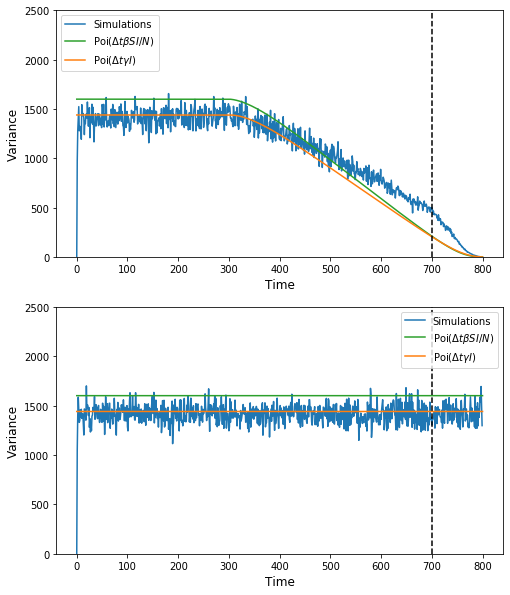

In [18]:
fig, ax = plt.subplots(2,1, figsize = (8, 10))
ax[0].plot(range(param_all['T']+param_all['BT']), np.var(VaccResults['I_sim'],0), 
           label = 'Simulations')

ax[0].plot(ts, VaccResults['I_theory'][:,0]*parametersVacc['N'],
           c='tab:green',
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
ax[0].plot(ts, VaccResults['I_theory'][:,1]*parametersVacc['N'],
           c='tab:orange',
           label = 'Poi'+r'$(\Delta t \gamma I $)')


ax[0].plot([r0_1_t, r0_1_t], [0, 1000000],
           '--',
           c='k')
ax[0].set_ylim([0, 2500])
ax[0].set_ylabel('Variance', fontsize = 12)
ax[0].set_xlabel('Time', fontsize = 12)
ax[0].legend()




ax[1].plot(range(param_all['T']+param_all['BT']), np.var(FixResults['I_sim'],0), 
           label = 'Simulations')

ax[1].plot(ts, FixResults['I_theory'][:,0]*parametersVacc['N'],
           c='tab:green', 
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
ax[1].plot(ts, FixResults['I_theory'][:,1]*parametersVacc['N'],
           c='tab:orange', 
           label = 'Poi'+r'$(\Delta t \gamma I $)')
ax[1].plot([r0_1_t, r0_1_t], [0, 1000000],
           '--', 
           c='k')
ax[1].set_ylim([0, 2500])
ax[1].set_ylabel('Variance', fontsize = 12)
ax[1].set_xlabel('Time', fontsize = 12)
ax[1].legend(loc = 'upper right')

# SIR model

In [19]:
parametersSIR = {'beta0': 0.1, 
               'gamma':0.01,
                'I0':  [(10000-10)/10000, (10)/10000], 
               'nu': 0,
               'mu': 0,
               'p_0': 0,
               'psign': 0,
                'N':10000}
T = 600

In [20]:
def PrevalenceTheorySIR(X, tt,RUN, BurnT,
                        beta0, gamma, p, nu=0,mu=0, p_0=0):
    S = -X[0]*beta0*X[1]
    I = X[0]*beta0*X[1]-gamma*X[1]
    return [S,I]

In [21]:
SIRResults = openFile(filePath = [file for file in files if 'SIR' in file][0], 
                      realisations = param_all['repeats'],
                     T=T,
                     BT= 0,
                     ST= param_all['ST'],
                      beta0=parametersSIR['beta0'],
                     gamma=parametersSIR['gamma'],
                     nu=parametersSIR['nu'],
                     mu=parametersSIR['mu'],
                     p0=parametersSIR['p_0'],
                     p = param_all['p'],
                     Initial=parametersSIR['I0'],
                     sign =parametersSIR['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheorySIR,
                     functionInc=NCM2,
                     SIR = True)

In [22]:
idx = np.argwhere(np.diff(np.sign(SIRResults['P_theory'][:,0]*(parametersSIR['beta0']/parametersSIR['gamma'])
                                  - np.ones(T*10)))).flatten()
tsSIR = np.arange(0, T, 0.1)
DeltaT = 0.1

Text(0, 0.5, 'Variance')

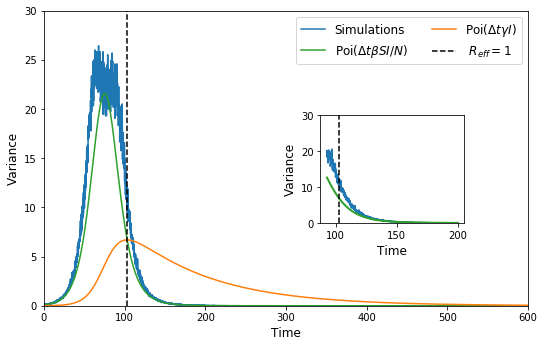

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
fig.subplots_adjust(left=.12, bottom=.12, right=.96, top=0.94);
ax.yaxis.get_offset_text().set_fontsize(12)


plt.plot(tsSIR, np.var(SIRResults['I_sim'], axis =0)
         ,label =r'Simulations')
plt.plot(tsSIR,DeltaT*SIRResults['I_theory'][:,0]*parametersSIR['N'],
           c='tab:green',
           label = 'Poi'+r'$(\Delta t \beta S I/N $)')
plt.plot(tsSIR, DeltaT*SIRResults['I_theory'][:,1]*parametersSIR['N'],
         c='tab:orange',
        label = 'Poi'+r'$(\Delta t \gamma I $)')

plt.plot([tsSIR[idx],tsSIR[idx]], [0,100000],
         '--',
         c='k',
         label = r' $R_{eff} = 1$')
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Variance', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12, ncol =2)
plt.xlim([0,T])
plt.ylim([0, 30])


subplot = plt.axes([.6, .35, .25, .3]);
index_from = int(tsSIR[idx]//1-10)
index_to = 200
subplot.plot(np.arange(index_from,index_to,0.1), (np.var(SIRResults['I_sim'], axis =0))[index_from*10:index_to*10],
             c='tab:blue',
             label =r'Poi($γ I_t$)');
subplot.plot(np.arange(index_from,index_to,0.1), (DeltaT*SIRResults['I_theory'][:,0]*parametersSIR['N'])[index_from*10:index_to*10],
             lw =2,
             c='tab:green',
             label = 'Poi'+r'$(\Delta t \beta S I/N $)');

subplot.plot([tsSIR[idx], tsSIR[idx]], [0,100000],
             '--', c='k')
subplot.set_ylim([0, 30])
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Variance', fontsize = 12)
